- ## <font color = red> Road Accident Casualties Across Calderdale :


Information on all road accident casualties across Calderdale. Data includes location, number of people and vehicles involved, road surface, weather conditions and severity of any casualties. Please note ----------- * The Eastings and Northings are generated at the roadside where the accident occurred. Sometimes due to poor internet connectivity this data is may not be as accurate as it could be. A useful tool to analyse the data is Excel pivot tables, these help summarise large amounts of data in a easy to view table. The road casualty reports refer to casualties who were killed or seriously injured, whereas the accident data refers to all road casualties.
- 1st Road Class	1st Road Class Desc
- 1	Motorway
- 2	A(M)
- 3	A
- 4	B
- 5	C
- 6	Unclassified
	
> - Road Surface	Road Surface Desc
- 1	Dry
- 2	Wet / Damp
- 3	Snow
- 4	Frost / Ice
- 5	Flood (surface water over 3cm deep)
	
> - Lighting Conditions	Lighting Conditions Desc
- 1	Daylight: street lights present
- 2	Daylight: no street lighting
- 3	Daylight: street lighting unknown
- 4	Darkness: street lights present and lit
- 5	Darkness: street lights present but unlit
- 6	Darkness: no street lighting
- 7	Darkness: street lighting unknown
	
> - Weather Conditions	Weather Conditions Desc
- 1	Fine without high winds
- 2	Raining without high winds
- 3	Snowing without high winds
- 4	Fine with high winds
- 5	Raining with high winds
- 6	Snowing with high winds
- 7	Fog or mist – if hazard
- 8	Other
- 9	Unknown
	
> - Casualty Class	Casualty Class Desc
- 1	Driver or rider
- 2	Vehicle or pillion passenger
- 3	Pedestrian
	
> - Casualty Severity	Casualty Severity Desc
- 1	Fatal
- 2	Serious
- 3	Slight
	
> - Sex of Casualty	Sex of Casualty Desc
- 1	Male
- 2	Female
	
> - Age of Casualty
- [Age given in years]
	
> - Type of Vehicle	Type of Vehicle Desc
- 1	Pedal cycle
- 2	M/cycle 50cc and under
- 3	Motorcycle over 50cc and up to 125cc
- 4	Motorcycle over 125cc and up to 500cc
- 5	Motorcycle over 500cc
- 6	[Not used]
- 7	[Not used]
- 8	Taxi/Private hire car
- 9	Car
- 10	Minibus (8 – 16 passenger seats)
- 11	Bus or coach (17 or more passenger seats)
- 12	[Not used]
- 13	[Not used]
- 14	Other motor vehicle
- 15	Other non-motor vehicle
- 16	Ridden horse
- 17	Agricultural vehicle (includes diggers etc.)
- 18	Tram / Light rail
- 19	Goods vehicle 3.5 tonnes mgw and under
- 20	Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw
- 21	Goods vehicle 7.5 tonnes mgw and over
- 22	Mobility Scooter
- 90	Other Vehicle 
- 97	Motorcycle - Unknown CC



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv(r"accident_2014.csv")
train.head()

Reference_Number  Grid Ref: Easting  Grid Ref: Northing  \
0          11S0281             407491              428929   
1          11S1147             412912              429039   
2          11S1147             412912              429039   
3          11U0285             407179              424776   
4          11U0285             407179              424776   

   Number_of_ Vehicles Accident Date  Time_24hr  1st_Road_Class  \
0                    1    28/01/2014        835               6   
1                    1    28/01/2014       1745               6   
2                    1    28/01/2014       1745               6   
3                    2    30/01/2014        900               6   
4                    2    30/01/2014        900               6   

  1st_Road_Class&No  Road_Surface  Lighting_Conditions  Weather_Conditions  \
0                 U             2                    1                   9   
1                 U             2                    4                   1   
2                 U             2                    4                   1   
3                 U             2                    1                   8   
4                 U             2                    1                   8   

  Local_Authority  Casualty_Class  Casualty_Severity  Sex_of_Casualty  \
0      Calderdale               3                  3                2   
1      Calderdale               3                  3                2   
2      Calderdale               3                  3                1   
3      Calderdale               1                  3                2   
4      Calderdale               2                  3                1   

   Age_of_Casualty  Vehicle_Number  Type_of_Vehicle  
0                8               1                9  
1               15               1                9  
2               17               1                9  
3               29               2                9  
4                9               2                9

In [4]:
import statsmodels.api as sm

In [6]:
train.columns

Index(['Reference_Number', 'Grid Ref: Easting', 'Grid Ref: Northing',
       'Number_of_ Vehicles', 'Accident Date', 'Time_24hr', '1st_Road_Class',
       '1st_Road_Class&No', 'Road_Surface', 'Lighting_Conditions',
       'Weather_Conditions', 'Local_Authority', 'Casualty_Class',
       'Casualty_Severity', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Vehicle_Number', 'Type_of_Vehicle'],
      dtype='object')

In [7]:
train.drop(train.columns[[0,1,2,4,11,12,16]] , axis = 1, inplace =True)

In [337]:
import pandas_profiling as pp
pp.ProfileReport(train)

In [8]:
train.isnull().sum()

Number_of_ Vehicles    0
Time_24hr              0
1st_Road_Class         0
1st_Road_Class&No      0
Road_Surface           0
Lighting_Conditions    0
Weather_Conditions     0
Casualty_Severity      0
Sex_of_Casualty        0
Age_of_Casualty        0
Type_of_Vehicle        0
dtype: int64

In [9]:
train.rename(columns = {'Number_of_ Vehicles' : 'Number_of_Vehicles' ,'Time_24hr' : 'Time_Of_Day', '1st_Road_Class' : 'Road_Class', 
                        '1st_Road_Class&No' : 'Road_Class_No'}, inplace = True)

In [10]:
train.head()

Number_of_Vehicles  Time_Of_Day  Road_Class Road_Class_No  Road_Surface  \
0                   1          835           6             U             2   
1                   1         1745           6             U             2   
2                   1         1745           6             U             2   
3                   2          900           6             U             2   
4                   2          900           6             U             2   

   Lighting_Conditions  Weather_Conditions  Casualty_Severity  \
0                    1                   9                  3   
1                    4                   1                  3   
2                    4                   1                  3   
3                    1                   8                  3   
4                    1                   8                  3   

   Sex_of_Casualty  Age_of_Casualty  Type_of_Vehicle  
0                2                8                9  
1                2               15                9  
2                1               17                9  
3                2               29                9  
4                1                9                9

In [11]:
train.nunique()

Number_of_Vehicles       7
Time_Of_Day            261
Road_Class               4
Road_Class_No           24
Road_Surface             5
Lighting_Conditions      5
Weather_Conditions       8
Casualty_Severity        3
Sex_of_Casualty          2
Age_of_Casualty         88
Type_of_Vehicle         12
dtype: int64

In [12]:
#creating function to identify time of day: morning, afternoon, evening, night, etc.
def time_of_day1(n):
    if n in range(400,800):    # 400 -800
        return 'Early Morning'
    elif n in range(800,1200):   # 800 - 1200
        return 'Morning'
    elif n in range(1200,1700):    # 1200 - 1700 
        return 'Afternoon'
    elif n in range(1700,2000):     # 1700 - 2000 
        return 'Evening'
    elif n in range(2000,2500) or n==0:     # 2000 - 2500
        return 'Night'
    elif n in range(100,400):               # 0 - 400
        return 'Late Night'

In [13]:
train['Time']=train['Time_Of_Day'].apply(lambda x: time_of_day1(x))

In [14]:
train.drop('Time_Of_Day', axis = 1, inplace = True)

<AxesSubplot:xlabel='Casualty_Severity', ylabel='count'>

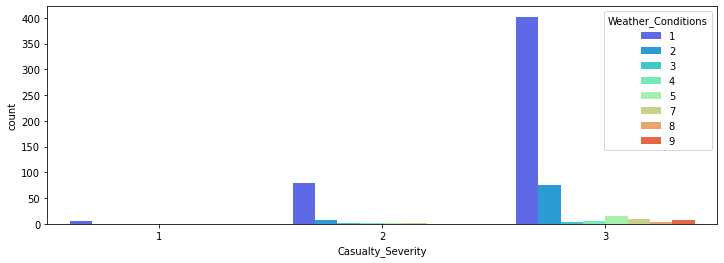

In [15]:
import seaborn as sns

plt.figure(figsize=(12,4))
sns.countplot(x='Casualty_Severity',data=train,hue='Weather_Conditions',palette='rainbow')

In [265]:
train.Casualty_Severity.value_counts()

3    524
2     93
1      6
Name: Casualty_Severity, dtype: int64

- #### Accidents usually take place in the afternoon: refer fig: Weather vs Hour_of_Accident
- #### Accidents with Slight severity occured the most
- #### Accidents ususally took place when the Weather conditions were fine and also there were'nt any high winds : meaning which the weather conditions didn't effectively contribute to occurences of accidents.

- ### Are certain car models safer than others?

In [266]:
train.isnull().sum()

Number_of_Vehicles     0
Road_Class             0
Road_Class_No          0
Road_Surface           0
Lighting_Conditions    0
Weather_Conditions     0
Casualty_Severity      0
Sex_of_Casualty        0
Age_of_Casualty        0
Type_of_Vehicle        0
Time                   2
dtype: int64

In [16]:
train.dropna(inplace = True)

In [17]:
# Unique values for all the columns
for col in train.columns[~(train.columns.isin(['Age_of_Casualty','Time_Of_Day ']))].tolist():
    print(" Unique Values --> " + col, ':', len(train[col].unique()), ': ', train[col].unique())

 Unique Values --> Number_of_Vehicles : 7 :  [1 2 3 4 5 7 6]
 Unique Values --> Road_Class : 4 :  [6 3 1 4]
 Unique Values --> Road_Class_No : 24 :  ['U' 'A646' 'A6025' 'A644' 'A58' 'M62' 'B6113' 'A629' 'A6139' 'A643'
 'A6033' 'B6114' 'A6036' 'A6026' 'A647' 'A681' 'A641' 'A6107' 'B6138'
 'B6112' 'A649' 'A672' 'B6147' 'A62']
 Unique Values --> Road_Surface : 5 :  [2 1 4 5 3]
 Unique Values --> Lighting_Conditions : 5 :  [1 4 6 7 5]
 Unique Values --> Weather_Conditions : 8 :  [9 1 8 2 4 3 5 7]
 Unique Values --> Casualty_Severity : 3 :  [3 2 1]
 Unique Values --> Sex_of_Casualty : 2 :  [2 1]
 Unique Values --> Type_of_Vehicle : 12 :  [ 9 19  8  1 11  5  3  2 20 90 21  4]
 Unique Values --> Time : 6 :  ['Morning' 'Evening' 'Night' 'Late Night' 'Afternoon' 'Early Morning']


map_vehicle_type={1:'Pedal cycle',
2:'Motorcycle 50cc and under',
3:'Motorcycle 125cc and under',
4:'Motorcycle over 125cc and up to 500cc',
5:'Motorcycle over 500cc',
8:'Taxi/Private hire car',
9:'Car',
10:'Minibus (8 - 16 passenger seats)',
11:'Bus or coach (17 or more pass seats)',
16:'Ridden horse',
17:'Agricultural vehicle',
18:'Tram',
19:'Van / Goods 3.5 tonnes mgw or under',
20:'Goods over 3.5t. and under 7.5t',
21:'Goods 7.5 tonnes mgw and over',
22:'Mobility scooter',
23:'Electric motorcycle',
90:'Other vehicle',
97:'Motorcycle - unknown cc',
98:'Goods vehicle - unknown weight'
}
train['Type_of_Vehicle'] = train['Type_of_Vehicle'].map(map_vehicle_type)

In [18]:
train['Number_of_Vehicles'] = train['Number_of_Vehicles'].map({1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7})
train['Road_Class'] = train['Road_Class'].map({1:1, 3:3, 4:4, 6:6})
train['Road_Class_No'] = train['Road_Class_No'].map({'U':1, 'A646':2, 'A6025':3, 'A644':4, 'A58':5, 'M62':6, 
                                                             'B6113':7, 'A629':8, 'A6139':9, 'A643':10, 'A6033':11, 'B6114':12,
                                                             'A6036':13, 'A6026':14, 'A647':15, 'A681':16, 'A641':17,
                                                             'A6107':18, 'B6138':19,'B6112':20, 'A649':21, 'A672':22,
                                                             'B6147':23, 'A62':24})
train['Road_Surface'] = train['Road_Surface'].map({1:1, 2:2, 3:3, 4:4, 5:5})
train['Lighting_Conditions'] = train['Lighting_Conditions'].map({1:1, 4:2, 5:3, 6:4, 7:5})
train['Weather_Conditions'] = train['Weather_Conditions'].map({1:1, 2:2, 3:3, 4:4, 5:5, 7:6,8:7,9:8})
train['Casualty_Severity'] = train['Casualty_Severity'].map({1:1, 2:2, 3:3})
train['Time'] = train['Time'].map({'Morning': 1, 'Evening': 2, 'Night':3, 'Late Night':4, 'Afternoon':5, 'Early Morning':6 })

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '8'),
  Text(6, 0, '9'),
  Text(7, 0, '11'),
  Text(8, 0, '19'),
  Text(9, 0, '20'),
  Text(10, 0, '21'),
  Text(11, 0, '90')])

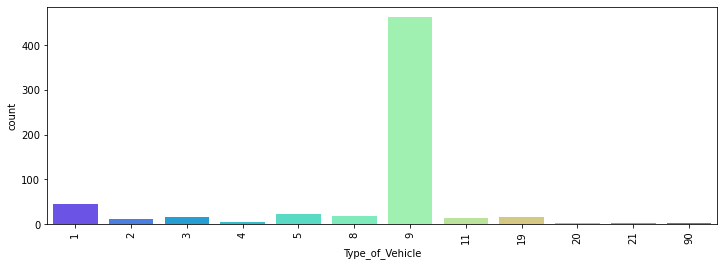

In [270]:
plt.figure(figsize=(12,4))
sns.countplot('Type_of_Vehicle',data=train, palette='rainbow')
plt.xticks(rotation=90)

### Number of accidents taking place with other vehciles are almost negligible as comapred to those with Cars.

In [19]:
train1 = train.dtypes.reset_index()
train1.columns = ["Count", "Column Type"]
train1

Count Column Type
0    Number_of_Vehicles       int64
1            Road_Class       int64
2         Road_Class_No       int64
3          Road_Surface       int64
4   Lighting_Conditions       int64
5    Weather_Conditions       int64
6     Casualty_Severity       int64
7       Sex_of_Casualty       int64
8       Age_of_Casualty       int64
9       Type_of_Vehicle       int64
10                 Time       int64

In [20]:
train1.groupby("Column Type").aggregate('count').reset_index()

Column Type  Count
0       int64     11

In [21]:
train.columns

Index(['Number_of_Vehicles', 'Road_Class', 'Road_Class_No', 'Road_Surface',
       'Lighting_Conditions', 'Weather_Conditions', 'Casualty_Severity',
       'Sex_of_Casualty', 'Age_of_Casualty', 'Type_of_Vehicle', 'Time'],
      dtype='object')

In [22]:
train['Number_of_Vehicles'] = train['Number_of_Vehicles'].astype('category')
train['Road_Class'] = train['Road_Class'].astype('category')
train['Road_Surface'] = train['Road_Surface'].astype('category')
train['Road_Class_No'] = train['Road_Class_No'].astype('category')
train['Lighting_Conditions'] = train['Lighting_Conditions'].astype('category')
train['Weather_Conditions'] = train['Weather_Conditions'].astype('category')
train['Sex_of_Casualty'] = train['Sex_of_Casualty'].astype('category')
train['Type_of_Vehicle'] = train['Type_of_Vehicle'].astype('category')
train['Casualty_Severity'] = train['Casualty_Severity'].astype('category')
train['Time'] = train['Time'].astype('category')


In [23]:
train2 = train.dtypes.reset_index()
train2.columns = ["Count", "Column Type"]
train2

Count Column Type
0    Number_of_Vehicles    category
1            Road_Class    category
2         Road_Class_No    category
3          Road_Surface    category
4   Lighting_Conditions    category
5    Weather_Conditions    category
6     Casualty_Severity    category
7       Sex_of_Casualty    category
8       Age_of_Casualty       int64
9       Type_of_Vehicle    category
10                 Time    category

In [24]:
train.head()

Number_of_Vehicles Road_Class Road_Class_No Road_Surface  \
0                  1          6             1            2   
1                  1          6             1            2   
2                  1          6             1            2   
3                  2          6             1            2   
4                  2          6             1            2   

  Lighting_Conditions Weather_Conditions Casualty_Severity Sex_of_Casualty  \
0                   1                  8                 3               2   
1                   2                  1                 3               2   
2                   2                  1                 3               1   
3                   1                  7                 3               2   
4                   1                  7                 3               1   

   Age_of_Casualty Type_of_Vehicle Time  
0                8               9    1  
1               15               9    2  
2               17               9    2  
3               29               9    1  
4                9               9    1

In [25]:
train.dtypes

Number_of_Vehicles     category
Road_Class             category
Road_Class_No          category
Road_Surface           category
Lighting_Conditions    category
Weather_Conditions     category
Casualty_Severity      category
Sex_of_Casualty        category
Age_of_Casualty           int64
Type_of_Vehicle        category
Time                   category
dtype: object

In [26]:
# Unique values for all the columns
for col in train.columns[~(train.columns.isin(['Age_of_Casualty','Time_Of_Day ']))].tolist():
    print(" Unique Values --> " + col, ':', len(train[col].unique()), ': ', train[col].unique())

 Unique Values --> Number_of_Vehicles : 7 :  [1, 2, 3, 4, 5, 7, 6]
Categories (7, int64): [1, 2, 3, 4, 5, 7, 6]
 Unique Values --> Road_Class : 4 :  [6, 3, 1, 4]
Categories (4, int64): [6, 3, 1, 4]
 Unique Values --> Road_Class_No : 24 :  [1, 2, 3, 4, 5, ..., 20, 21, 22, 23, 24]
Length: 24
Categories (24, int64): [1, 2, 3, 4, ..., 21, 22, 23, 24]
 Unique Values --> Road_Surface : 5 :  [2, 1, 4, 5, 3]
Categories (5, int64): [2, 1, 4, 5, 3]
 Unique Values --> Lighting_Conditions : 5 :  [1, 2, 4, 5, 3]
Categories (5, int64): [1, 2, 4, 5, 3]
 Unique Values --> Weather_Conditions : 8 :  [8, 1, 7, 2, 4, 3, 5, 6]
Categories (8, int64): [8, 1, 7, 2, 4, 3, 5, 6]
 Unique Values --> Casualty_Severity : 3 :  [3, 2, 1]
Categories (3, int64): [3, 2, 1]
 Unique Values --> Sex_of_Casualty : 2 :  [2, 1]
Categories (2, int64): [2, 1]
 Unique Values --> Type_of_Vehicle : 12 :  [9, 19, 8, 1, 11, ..., 2, 20, 90, 21, 4]
Length: 12
Categories (12, int64): [9, 19, 8, 1, ..., 20, 90, 21, 4]
 Unique Values --> 

In [27]:
train.dtypes

Number_of_Vehicles     category
Road_Class             category
Road_Class_No          category
Road_Surface           category
Lighting_Conditions    category
Weather_Conditions     category
Casualty_Severity      category
Sex_of_Casualty        category
Age_of_Casualty           int64
Type_of_Vehicle        category
Time                   category
dtype: object

train1 = pd.get_dummies(train, drop_first = True)
train1.head()

In [28]:
print(train.columns)

Index(['Number_of_Vehicles', 'Road_Class', 'Road_Class_No', 'Road_Surface',
       'Lighting_Conditions', 'Weather_Conditions', 'Casualty_Severity',
       'Sex_of_Casualty', 'Age_of_Casualty', 'Type_of_Vehicle', 'Time'],
      dtype='object')


<AxesSubplot:>

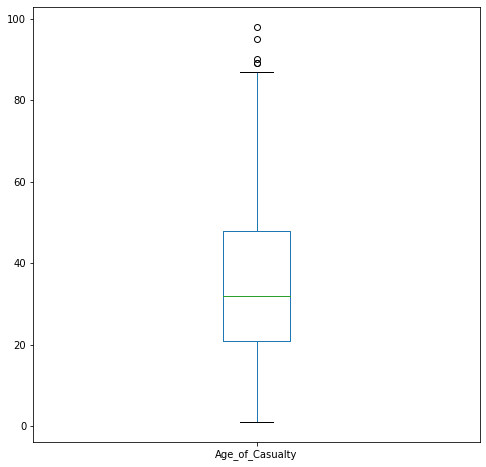

In [281]:
train['Age_of_Casualty'].plot(kind = 'box',figsize = (8,8))

In [29]:
X = train.drop("Casualty_Severity", axis = 1)
X.head()

Number_of_Vehicles Road_Class Road_Class_No Road_Surface  \
0                  1          6             1            2   
1                  1          6             1            2   
2                  1          6             1            2   
3                  2          6             1            2   
4                  2          6             1            2   

  Lighting_Conditions Weather_Conditions Sex_of_Casualty  Age_of_Casualty  \
0                   1                  8               2                8   
1                   2                  1               2               15   
2                   2                  1               1               17   
3                   1                  7               2               29   
4                   1                  7               1                9   

  Type_of_Vehicle Time  
0               9    1  
1               9    2  
2               9    2  
3               9    1  
4               9    1

In [30]:
y = train[['Casualty_Severity']]
y.head()
y.value_counts()

Casualty_Severity
3                    523
2                     92
1                      6
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=2018)

In [32]:
X_train.head()
#y_train.value_counts()

Number_of_Vehicles Road_Class Road_Class_No Road_Surface  \
253                  4          6             1            2   
233                  3          3             5            1   
113                  1          3            10            2   
219                  2          4             7            2   
108                  2          3            14            5   

    Lighting_Conditions Weather_Conditions Sex_of_Casualty  Age_of_Casualty  \
253                   2                  1               1               33   
233                   1                  1               2               53   
113                   1                  1               1               50   
219                   1                  2               2               45   
108                   1                  2               1               23   

    Type_of_Vehicle Time  
253               9    3  
233               9    2  
113               9    1  
219               9    1  
108               9    6

In [33]:
from sklearn.ensemble import RandomForestClassifier    # Random Forest

random_forest2 = RandomForestClassifier(n_estimators=100)
random_forest2.fit(X_train, y_train)
y_pred = random_forest2.predict(X_train)


from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
c_m = confusion_matrix(y_train , y_pred)
c_r = classification_report(y_train , y_pred)
a_c = accuracy_score(y_train , y_pred)

print(c_m)
print(c_r)
print(a_c)
#print(y_pred)

C:\Users\Akshay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[[  4   0   1]
 [  0  65   1]
 [  0   1 362]]
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.98      0.98      0.98        66
           3       0.99      1.00      1.00       363

    accuracy                           0.99       434
   macro avg       0.99      0.93      0.96       434
weighted avg       0.99      0.99      0.99       434

0.9930875576036866


In [34]:
X_train.isnull().sum()

Number_of_Vehicles     0
Road_Class             0
Road_Class_No          0
Road_Surface           0
Lighting_Conditions    0
Weather_Conditions     0
Sex_of_Casualty        0
Age_of_Casualty        0
Type_of_Vehicle        0
Time                   0
dtype: int64

In [35]:
for col in X_train.columns[~(X_train.columns.isin(['Age_of_Casualty']))].tolist():
    print(" Unique Values --> " + col, ':', len(X_train[col].unique()), ': ', X_train[col].unique())

 Unique Values --> Number_of_Vehicles : 6 :  [4, 3, 1, 2, 5, 7]
Categories (6, int64): [4, 3, 1, 2, 5, 7]
 Unique Values --> Road_Class : 4 :  [6, 3, 4, 1]
Categories (4, int64): [6, 3, 4, 1]
 Unique Values --> Road_Class_No : 24 :  [1, 5, 10, 7, 14, ..., 13, 9, 24, 18, 23]
Length: 24
Categories (24, int64): [1, 5, 10, 7, ..., 9, 24, 18, 23]
 Unique Values --> Road_Surface : 5 :  [2, 1, 5, 4, 3]
Categories (5, int64): [2, 1, 5, 4, 3]
 Unique Values --> Lighting_Conditions : 4 :  [2, 1, 4, 5]
Categories (4, int64): [2, 1, 4, 5]
 Unique Values --> Weather_Conditions : 8 :  [1, 2, 5, 8, 6, 3, 4, 7]
Categories (8, int64): [1, 2, 5, 8, 6, 3, 4, 7]
 Unique Values --> Sex_of_Casualty : 2 :  [1, 2]
Categories (2, int64): [1, 2]
 Unique Values --> Type_of_Vehicle : 12 :  [9, 1, 5, 8, 4, ..., 11, 3, 20, 90, 21]
Length: 12
Categories (12, int64): [9, 1, 5, 8, ..., 3, 20, 90, 21]
 Unique Values --> Time : 6 :  [3, 2, 1, 6, 5, 4]
Categories (6, int64): [3, 2, 1, 6, 5, 4]


In [36]:
X_train.columns

Index(['Number_of_Vehicles', 'Road_Class', 'Road_Class_No', 'Road_Surface',
       'Lighting_Conditions', 'Weather_Conditions', 'Sex_of_Casualty',
       'Age_of_Casualty', 'Type_of_Vehicle', 'Time'],
      dtype='object')

In [37]:
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)


calculate_vif(X_train)

Var   Vif
3         Road_Surface  8.05
6      Sex_of_Casualty  7.75
4  Lighting_Conditions  6.41
1           Road_Class  6.00
9                 Time  4.91
0   Number_of_Vehicles  4.45
7      Age_of_Casualty  4.28
8      Type_of_Vehicle  3.94
5   Weather_Conditions  2.79
2        Road_Class_No  2.32

### From the output, we can see that the dummy variables which are created using one-hot encoding have VIF above 5. We have a multicollinearity problem.
### Now, let us drop one of the dummy variables to solve the multicollinearity issue:

In [43]:
df = X_train.drop(X_train.columns[[3,6,4,1]], axis=1)
calculate_vif(df)

Var   Vif
0  Number_of_Vehicles  4.10
5                Time  4.08
3     Age_of_Casualty  3.78
4     Type_of_Vehicle  3.44
2  Weather_Conditions  2.10
1       Road_Class_No  1.85

### import joblib #for gui
#### import pickle #for gui
#### pickle.dump(random_forest2, open("rf_accident4.pickle", "wb"))

In [432]:
import joblib 
joblib.dump(random_forest2 , 'rf_accident3.pkl')

['rf_accident3.pkl']

In [433]:
import pickle
pickle_out = open('rf_accident3.pkl', 'wb')
pickle.dump(random_forest2, pickle_out)
pickle_out.close()

In [59]:
from tkinter import*
from PIL import ImageTk, Image
import pickle
root=Tk() #create window
root.geometry("1300x650") #size of window
root.configure() #color of window

def model(Number_of_Vehicles, Road_Class, Road_Class_No, Road_Surface,Lighting_Conditions, Weather_Conditions, 
          Sex_of_Casualty,Age_of_Casualty, Type_of_Vehicle, Time):
    loaded_model1 = pickle.load(open("rf_accident3.pkl", "rb"))
    prediction = loaded_model1.predict([[Number_of_Vehicles, Road_Class, Road_Class_No, Road_Surface,Lighting_Conditions, 
                                         Weather_Conditions, Sex_of_Casualty,Age_of_Casualty, Type_of_Vehicle, Time]])  #order important
   
    if prediction == [1]:
        notif1.configure(text="Your Patient is Fatal.", bg="red",fg = 'white') 
    elif prediction == [2]:
        notif1.configure(text="Your Patient is Serious.", bg="red",fg = 'white')
    else:
        notif1.configure(text="Your Patient is Slight.", bg="green",fg = 'white') 
        

def exit_app():
    root.destroy()
    
Head1 = Label(root, text="AIS Solutions Pvt Ltd", font=('Times New Roman',30,"bold"),fg = 'Black').pack() #square box
Head2 = Label(root,text="Road Accident - Patient's Severity Prediction",font=('Cambria',20,'bold'),fg = 'red').pack() #spacing

Number_of_Vehicles=Label(root,text="Number of Vehicles ( 1 / 2 / 3 / 4 / 5 / 7 )", anchor = "nw", bg="grey",fg = 'white',
                         font=('Helvetica',10,'bold'),relief="solid",width=53, height = 2).place(x=30,y=110) #to shift box
Number_of_Vehicles_input=Entry(root,bd=5,width="20",font=("Arial sans MS",10, 'bold'), justify = CENTER )
Number_of_Vehicles_input.place(x=480,y=110)


Road_Class =Label(root,text="Road Class ( 1 / 3 / 4 / 6 )", anchor = "nw",font=('Helvetica',10,'bold'),
                  relief="solid",width=53, height = 2, bg="grey",fg = 'white').place(x=30,y=150)
Road_Class_input=Entry(root,bd=5,width="20",font=("Arial sans MS",10, 'bold'), justify = CENTER)
Road_Class_input.place(x=480,y=150)

E1 = """Road Class No   ( U : 1,  A646 : 2,  A6025 : 3,  A644 : 4,  A58 : 5,  M62 : 6,  B6113 : 7,  A629 : 8,  A6139 : 9, A643 : 10, 
        A6033 : 11,  B6114 : 12, A6036 : 13,  A6026 : 14,  A647 : 15,  A681 : 16,  A641 : 17, A6107 :18,  B6138 : 19,
        B6112 : 20,  A649 : 21,  A672 : 22, B6147 : 23, A62 : 24 )"""

Road_Class_No =Label(root,text=E1,bg="grey",fg = 'white',
                     font=('Helvetica',9,'bold'),wraplength = 360,anchor = "nw",
                     relief="solid",width=60, height = 5).place(x=30,y=190)
Road_Class_No_input=Entry(root,bd=5, width="20",font=("Arial sans MS",10, 'bold'), justify = CENTER)
Road_Class_No_input.place(x=480,y=190)



E2 = """Road Surface (1 - Dry, 2 - Wet / Damp, 3 - Snow, 4 - Frost / Ice, 5 - Flood)"""

Road_Surface=Label(root,text=E2, bg="grey",fg = 'white',
                   font=('Helvetica',9,'bold'),anchor = "nw",
                   relief="solid",width=60, height = 2).place(x=30,y=275)
Road_Surface_input=Entry(root,bd=5,width="20",font=("Arial sans MS",10, 'bold'), justify = CENTER)
Road_Surface_input.place(x=480,y=275)

E3 = """Lighting Conditions (1 - Daylight: street lights present, 
2 - Daylight: no street lighting,  
3 - Daylight: street lighting unknown, 
4 - Darkness: street lights present and lit, 
5 - Darkness: street lights present but unlit,  
6 - Darkness: no street lighting,  
7 - Darkness: street lighting unknown )"""

Lighting_Conditions=Label(root,text= E3, bg="grey",fg = 'white',
                          font=('Helvetica',9,'bold'), wraplength = 360, anchor = "nw",
                          relief="solid",width=60,  height = 5).place(x=30,y=315)
Lighting_Conditions_input=Entry(root,bd=5,width="20",font=("Arial sans MS",10, 'bold'), justify = CENTER)
Lighting_Conditions_input.place(x=480,y=315)


E4 = """Weather Conditions ( 1 - Fine without high winds, 
2 - Raining without high winds, 
3 - Snowing without high winds, 
4 - Fine with high winds, 
5 - Raining with high winds, 
6 - Snowing with high winds, 
7 - Fog or mist – if hazard, 
8 - Other, 9 - Unknown )"""

Weather_Conditions=Label(root,text= E4, wraplength = 360, anchor = "nw",
                         font=('Helvetica',10,'bold'), bg="grey",fg = 'white',
                         relief="solid",width=53).place(x=30,y=400)
Weather_Conditions_input=Entry(root,bd=5,width="20", font=("Arial sans MS",10, 'bold'), justify = CENTER)
Weather_Conditions_input.place(x=480,y=400)


Sex_of_Casualty=Label(root,text="Sex of Casualty (1 - Male, 2 - Female)", wraplength = 360, anchor = "nw",
                      font=('Helvetica',10,'bold'), bg="grey",fg = 'white',
                      relief="solid",width=53, height = 2).place(x=30,y=540)
Sex_of_Casualty_input=Entry(root,bd=5,width="20",font=("Arial sans MS",10, 'bold'), justify = CENTER)
Sex_of_Casualty_input.place(x=480,y=540)

E5 = """Type of Vehicle ( 1 - Pedal cycle, 2 - M/cycle 50cc and under,
3 - Motorcycle over 50cc - 125cc, 4 - Motorcycle over 125cc - 500cc,
5 - Motorcycle over 500cc, 6 - [Not used], 
7 - [Not used], 8 - Taxi/Private hire car, 
9 - Car, 10 - Minibus , 11 - Bus or coach , 
12 - [Not used], 13 - [Not used], 14 - Other motor vehicle, 
15 - Other non-motor vehicle, 16 - Ridden horse, 
17 - Agricultural vehicle, 18 - Tram / Light rail, 
19 - Goods vehicle < 3.5 tonnes mgw , 20 - Goods vehicle          (3.5 - 7.5 tonnes mgw) , 21 - Goods vehicle 7.5 tonnes mgw ,
22 - Mobility Scooter, 90 - Other Vehicle, 97 - Motorcycle - Unknown CC"""
Type_of_Vehicle=Label(root,text=E5, wraplength = 420, anchor = "nw",
                      font=('Helvetica',10,'bold'), bg="grey",fg = 'white',
                      relief="solid", width=60).place(x=650,y=110)
Type_of_Vehicle_input=Entry(root,bd=5,width="18",font=("Arial sans MS",10, 'bold'), justify = CENTER)
Type_of_Vehicle_input.place(x=1150,y=110)


Age_of_Casualty =Label(root,text="Age of Casualty (In Year)", anchor = "sw",
                       font=('Helvetica',10,'bold'), bg="grey",fg = 'white',
                       relief="solid",width=60).place(x=650,y=320)
Age_of_Casualty_input=Entry(root,bd=5,width="18",font=("Arial sans MS",10, 'bold'), justify = CENTER)
Age_of_Casualty_input.place(x=1150,y=320)

E6 = """ Time ( Early Morning = 1, Morning = 2, Afternoon = 3, Evening = 4, Night = 5, Late Night = 6 )"""
Time=Label(root,text=E6,  wraplength = 360, anchor = "sw", bg="grey",fg = 'white',
           font=('Helvetica',10,'bold'),relief="solid",width=60, height = 2).place(x=650,y=360)
Time_input=Entry(root,bd=5,width="18",font=("Arial sans MS",10, 'bold'), justify = CENTER)
Time_input.place(x=1150,y=360)


but1 = Button(root,text="Click To Know Patient Status ", bg="orange",fg = 'white', font=("Arial sans MS",10,"bold"),
              width="30", height="2",command=lambda: model(Number_of_Vehicles_input.get(),
                                                                                      Road_Class_input.get(),
                                                                                      Road_Class_No_input.get(),
                                                                                      Road_Surface_input.get(),
                                                                                      Lighting_Conditions_input.get(),
                                                                                      Weather_Conditions_input.get(),
                                                                                      Sex_of_Casualty_input.get(),
                                                                                      Type_of_Vehicle_input.get(),
                                                                                      Age_of_Casualty_input.get(),
                                                                                      Time_input.get()))
notif1 = Label(root, text="",font=("Arial sans MS",20,"bold") )
button_exit = Button(root, text = "Exit", bg="red",fg = 'white', width="20", height="2", command = exit_app) 

button_exit.place(x=1000,y=450)
but1.place(x=700,y=450)
notif1.place(x=700,y=500)
root.resizable(0,0)
root.mainloop()

In [293]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(k_neighbors= 4)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)
y_train_smt.value_counts()

Casualty_Severity
3                    363
2                    363
1                    363
dtype: int64

In [294]:
X_train_smt.isnull().sum()

Number_of_Vehicles      0
Road_Class             93
Road_Class_No           0
Road_Surface            0
Lighting_Conditions     0
Weather_Conditions      0
Sex_of_Casualty         0
Age_of_Casualty         0
Type_of_Vehicle        47
Time                    0
dtype: int64

In [439]:
oversampler=SMOTE(kind='regular',k_neighbors=2)

TypeError: __init__() got an unexpected keyword argument 'kind'

In [295]:
from sklearn.ensemble import RandomForestClassifier    # Random Forest

random_forest1 = RandomForestClassifier(n_estimators=100)
random_forest1.fit(X_train_smt, y_train_smt)
y_pred = random_forest1.predict(X_train)


from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
c_m = confusion_matrix(y_train , y_pred)
c_r = classification_report(y_train , y_pred)
a_c = accuracy_score(y_train , y_pred)

print(c_m)
print(c_r)
print(a_c)
#print(y_pred)

C:\Users\Akshay\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[[  5   0   0]
 [  0  65   1]
 [  1   3 359]]
              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       0.96      0.98      0.97        66
           3       1.00      0.99      0.99       363

    accuracy                           0.99       434
   macro avg       0.93      0.99      0.96       434
weighted avg       0.99      0.99      0.99       434

0.988479262672811


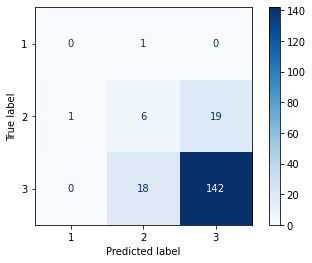

In [296]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(random_forest1, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [298]:
feature_imp = pd.Series(random_forest1.feature_importances_,index=X.sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

TypeError: Index(...) must be called with a collection of some kind, 'x' was passed

In [ ]:
import joblib
joblib.dump(random_forest1, 'rf_accident2.pkl')

In [ ]:
import pickle
pickle_out = open('rf_accident2.pkl', 'wb')
pickle.dump(random_forest1,pickle_out)
pickle_out.close()

In [ ]:
X_train_smt.isnull().sum()

In [360]:
X_train_smt.columns

Index(['Number_of_Vehicles', 'Road_Class', 'Road_Class_No', 'Road_Surface',
       'Lighting_Conditions', 'Weather_Conditions', 'Sex_of_Casualty',
       'Age_of_Casualty', 'Type_of_Vehicle', 'Time'],
      dtype='object')

In [359]:
X_train_smt.head()

Number_of_Vehicles Road_Class Road_Class_No Road_Surface  \
0                  4          6             1            2   
1                  3          3             5            1   
2                  1          3            10            2   
3                  2          4             7            2   
4                  2          3            14            5   

  Lighting_Conditions Weather_Conditions Sex_of_Casualty  Age_of_Casualty  \
0                   2                  1               1               33   
1                   1                  1               2               53   
2                   1                  1               1               50   
3                   1                  2               2               45   
4                   1                  2               1               23   

  Type_of_Vehicle Time  
0               9    3  
1               9    2  
2               9    1  
3               9    1  
4               9    6

In [299]:
for col in X_train_smt.columns[~(X_train_smt.columns.isin(['Age_of_Casualty']))].tolist():
    print(" Unique Values --> " + col, ':', len(X_train_smt[col].unique()), ': ', X_train_smt[col].unique())

 Unique Values --> Number_of_Vehicles : 6 :  [4, 3, 1, 2, 5, 7]
Categories (6, int64): [4, 3, 1, 2, 5, 7]
 Unique Values --> Road_Class : 5 :  [6, 3, 4, 1, NaN]
Categories (4, int64): [6, 3, 4, 1]
 Unique Values --> Road_Class_No : 24 :  [1, 5, 10, 7, 14, ..., 13, 9, 24, 18, 23]
Length: 24
Categories (24, int64): [1, 5, 10, 7, ..., 9, 24, 18, 23]
 Unique Values --> Road_Surface : 5 :  [2, 1, 5, 4, 3]
Categories (5, int64): [2, 1, 5, 4, 3]
 Unique Values --> Lighting_Conditions : 4 :  [2, 1, 4, 5]
Categories (4, int64): [2, 1, 4, 5]
 Unique Values --> Weather_Conditions : 8 :  [1, 2, 5, 8, 6, 3, 4, 7]
Categories (8, int64): [1, 2, 5, 8, 6, 3, 4, 7]
 Unique Values --> Sex_of_Casualty : 2 :  [1, 2]
Categories (2, int64): [1, 2]
 Unique Values --> Type_of_Vehicle : 13 :  [9, 1, 5, 8, 4, ..., 3, 20, 90, 21, NaN]
Length: 13
Categories (12, int64): [9, 1, 5, 8, ..., 3, 20, 90, 21]
 Unique Values --> Time : 6 :  [3, 2, 1, 6, 5, 4]
Categories (6, int64): [3, 2, 1, 6, 5, 4]


In [248]:
from tkinter import*
import tkinter as tk 
from tkinter import ttk 
from PIL import ImageTk, Image
import pickle
root=Tk() #create window
root.geometry("1300x800") #size of window
root.configure(background="lightblue") #color of window

def model(Number_of_Vehicles, Road_Class, Road_Class_No, Road_Surface,Lighting_Conditions, Weather_Conditions, 
          Sex_of_Casualty,Age_of_Casualty, Type_of_Vehicle, Time):
    loaded_model1 = pickle.load(open("rf_accident3.pkl", "rb"))
    prediction = loaded_model1.predict([[Number_of_Vehicles, Road_Class, Road_Class_No, Road_Surface,Lighting_Conditions, 
                                         Weather_Conditions, Sex_of_Casualty,Age_of_Casualty, Type_of_Vehicle, Time]])  #order important
   
    if prediction == [1]:
        notif1.configure(text="Your Patient is Fatal") 
    elif prediction == [2]:
        notif1.configure(text="Your Patient is Serious")
    else:
        notif1.configure(text="Your Patient is Slight") 
        
    
    
Head1 = Label(root, text="AIS Solutions Pvt Ltd", font=('Times New Roman',22,"bold"),bg="orange",fg = 'Black').pack() #square box
Head2 = Label(root,text="Road Accident Prediction",font=('Cambria',14,'bold'),bg="red",fg = 'white',relief="solid").pack(pady=(10,0)) #spacing

Number_of_Vehicles=Label(root,text="Number_of_Vehicles ( 1 / 2 / 3 / 4 / 5 / 7 )", anchor = "nw",
                         font=('Helvetica',10,'bold'),bg="white",relief="solid",width=53, height = 2).place(x=30,y=110) #to shift box
Number_of_Vehicles_input=Entry(root,bd=5,width="20",font=("Arial sans MS",10))
Number_of_Vehicles_input.place(x=480,y=110)


Road_Class =Label(root,text="Road Class ( 1 / 3 / 4 / 6 )", anchor = "nw",font=('Helvetica',10,'bold'),
                  bg="white",relief="solid",width=53, height = 2).place(x=30,y=150)
Road_Class_input=Entry(root,bd=5,width="20",font=("Arial sans MS",10))
Road_Class_input.place(x=480,y=150)


E1 = """Road Class No   ( U : 1,  A646 : 2,  A6025 : 3,  A644 : 4,  A58 : 5,  M62 : 6,  B6113 : 7,  A629 : 8,  A6139 : 9, A643 : 10, 
        A6033 : 11,  B6114 : 12, A6036 : 13,  A6026 : 14,  A647 : 15,  A681 : 16,  A641 : 17, A6107 :18,  B6138 : 19,
        B6112 : 20,  A649 : 21,  A672 : 22, B6147 : 23, A62 : 24 )"""

Road_Class_No =Label(root,text=E1,
                     font=('Helvetica',9,'bold'),wraplength = 360,anchor = "nw",
                     bg="white",relief="solid",width=60, height = 5).place(x=30,y=190)
Road_Class_No_input=Entry(root,bd=5, width="20",font=("Arial sans MS",10))
Road_Class_No_input.place(x=480,y=190)



E2 = """Road Surface (1 - Dry, 2 - Wet / Damp, 3 - Snow, 4 - Frost / Ice, 5 - Flood)"""

Road_Surface=Label(root,text=E2,
                   font=('Helvetica',9,'bold'),anchor = "nw",
                   bg="white",relief="solid",width=60, height = 2).place(x=30,y=275)
Road_Surface_input=Entry(root,bd=5,width="20",font=("Arial sans MS",10))
Road_Surface_input.place(x=480,y=275)


E3 = """Lighting Conditions (1 - Daylight: street lights present, 
2 - Daylight: no street lighting,  
3 - Daylight: street lighting unknown, 
4 - Darkness: street lights present and lit, 
5 - Darkness: street lights present but unlit,  
6 - Darkness: no street lighting,  
7 - Darkness: street lighting unknown )"""

Lighting_Conditions=Label(root,text= E3,
                          font=('Helvetica',9,'bold'), wraplength = 360, anchor = "nw",
                          bg="white",relief="solid",width=60,  height = 5).place(x=30,y=315)
Lighting_Conditions_input=Entry(root,bd=5,width="20",font=("Arial sans MS",10))
Lighting_Conditions_input.place(x=480,y=315)


E4 = """Weather Conditions ( 1 - Fine without high winds, 
2 - Raining without high winds, 
3 - Snowing without high winds, 
4 - Fine with high winds, 
5 - Raining with high winds, 
6 - Snowing with high winds, 
7 - Fog or mist – if hazard, 
8 - Other, 9 - Unknown )"""

Weather_Conditions=Label(root,text= E4, wraplength = 360, anchor = "nw",
                         font=('Helvetica',10,'bold'), 
                         bg="white",relief="solid",width=53).place(x=30,y=400)
Weather_Conditions_input=Entry(root,bd=5,width="20", font=("Arial sans MS",10))
Weather_Conditions_input.place(x=480,y=400)


Sex_of_Casualty=Label(root,text="Sex of Casualty (1 - Male, 2 - Female)", wraplength = 360, anchor = "nw",
                      font=('Helvetica',10,'bold'),
                      bg="white",relief="solid",width=53, height = 2).place(x=30,y=540)
Sex_of_Casualty_input=Entry(root,bd=5,width="20",font=("Arial sans MS",10))
Sex_of_Casualty_input.place(x=480,y=540)


E5 = """Type of Vehicle ( 1 - Pedal cycle, 2 - M/cycle 50cc and under,
3 - Motorcycle over 50cc - 125cc, 4 - Motorcycle over 125cc - 500cc,
5 - Motorcycle over 500cc, 6 - [Not used], 
7 - [Not used], 8 - Taxi/Private hire car, 
9 - Car, 10 - Minibus , 11 - Bus or coach , 
12 - [Not used], 13 - [Not used], 14 - Other motor vehicle, 
15 - Other non-motor vehicle, 16 - Ridden horse, 
17 - Agricultural vehicle, 18 - Tram / Light rail, 
19 - Goods vehicle < 3.5 tonnes mgw , 20 - Goods vehicle          (3.5 - 7.5 tonnes mgw) , 21 - Goods vehicle 7.5 tonnes mgw ,
22 - Mobility Scooter, 90 - Other Vehicle, 97 - Motorcycle - Unknown CC"""

# Combobox creation 
Type_of_Vehicle = tk.StringVar() 
choosen = ttk.Combobox(root, width = 80, textvariable = Type_of_Vehicle ) 
  
# Adding combobox drop down list 
choosen['values'] = ( '1__Pedal_cycle',
                      '2__M/cycle_50cc_and_under',
                      '3__Motorcycle_over_50cc_and_up_to 125cc',
                      '4_ Motorcycle_over_125cc_and_up_to_500cc',
                      '5__Motorcycle_over_500cc',
                      '6_ [Not used]',
                      '7__[Not used]',
                      '8__Taxi/Private hire car',
                      '9__Car',
                      '10__Minibus_(8_–_16_passenger_seats)',
                      '11__Bus_or_coach_17_or_more_passenger_seats)',
                      '12__[Not used]',
                      '13__[Not used]',
                      '14__Other_motor_vehicle'
                      '15__Other_non-motor_vehicle',
                      '16__Ridden_horse',
                      '17__Agricultural_vehicle_(includes_diggers_etc.)',
                      '18__Tram_/_Light rail',
                      '19__Goods_vehicle_3.5_tonnes_mgw_and_under',
                      '20__Goods_vehicle_over_3.5_tonnes_and_under_7.5_tonnes_mgw',
                      '21__Goods_vehicle_7.5_tonnes_mgw_and_over',
                      '22_Mobility_Scooter',
                      '90__Other_Vehicle',
                      '97__Motorcycle_-_Unknown_CC') 
  
choosen.place(x=750,y=100)
choosen.current() 
Type_of_Vehicle.set('Car')

Age_of_Casualty =Label(root,text="Age of Casualty (In Year)", anchor = "sw",
                       font=('Helvetica',10,'bold'),
                       bg="white",relief="solid",width=60).place(x=650,y=320)
Age_of_Casualty_input=Entry(root,bd=5,width="20",font=("Arial sans MS",10))
Age_of_Casualty_input.place(x=1150,y=320)


E6 = """ Time ( Early Morning = 1, Morning = 2, Afternoon = 3, Evening = 4, Night = 5, Late Night = 6 )"""
Time=Label(root,text=E6,  wraplength = 360, anchor = "sw",
           font=('Helvetica',10,'bold'),bg="white",relief="solid",width=60, height = 2).place(x=650,y=360)
Time_input=Entry(root,bd=5,width="20",font=("Arial sans MS",10))
Time_input.place(x=1150,y=360)


but1 = Button(root,text="Click To Know  Patient Status ",
              width="30", height="2",command=lambda: model(Number_of_Vehicles_input.get(),
                                                                                      Road_Class_input.get(),
                                                                                      Road_Class_No_input.get(),
                                                                                      Road_Surface_input.get(),
                                                                                      Lighting_Conditions_input.get(),
                                                                                      Weather_Conditions_input.get(),
                                                                                      Sex_of_Casualty_input.get(),
                                                                                      Type_of_Vehicle_input.get(),
                                                                                      Age_of_Casualty_input.get(),
                                                                                      Time_input.get()))
notif1 = Label(root, text="",font=("Arial sans MS",20,"bold"))

but1.place(x=700,y=450)
notif1.place(x=700,y=500)
root.resizable(0,0)
root.mainloop()